# Assignment for Day 21:

## Attrition Rate Analysis for HR Case Study

__The Attrition Rate analysis gives the data handling for the logistic regression modeling and helps to predict the factors influencing the attrition__

___Import Necessary Libraries___

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelBinarizer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [2]:
DS_PATH="./dataset/general_data.csv"
def load_attrition_data(path=DS_PATH):
    return pd.read_csv(path)

___Load the attrition dataset___

In [3]:
attrition = load_attrition_data()

In [4]:
attrition.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [5]:
attrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

___There are some single direction variables on the dataframe which needs to be handled better___

In [6]:
attrition.Over18.value_counts()

Y    4410
Name: Over18, dtype: int64

In [7]:
attrition.StandardHours.value_counts()

8    4410
Name: StandardHours, dtype: int64

In [8]:
attrition.EmployeeID.value_counts()

2047    1
2632    1
2620    1
573     1
2624    1
       ..
1302    1
3347    1
1298    1
3343    1
2049    1
Name: EmployeeID, Length: 4410, dtype: int64

In [9]:
attrition.EmployeeCount.value_counts()

1    4410
Name: EmployeeCount, dtype: int64

___As these are unique variables which needs to be dropped off___

In [10]:
attrition.drop(columns=["Over18", "StandardHours", "EmployeeID", "EmployeeCount"], inplace=True)

___Lets plot histogram for understanding on the distribution___

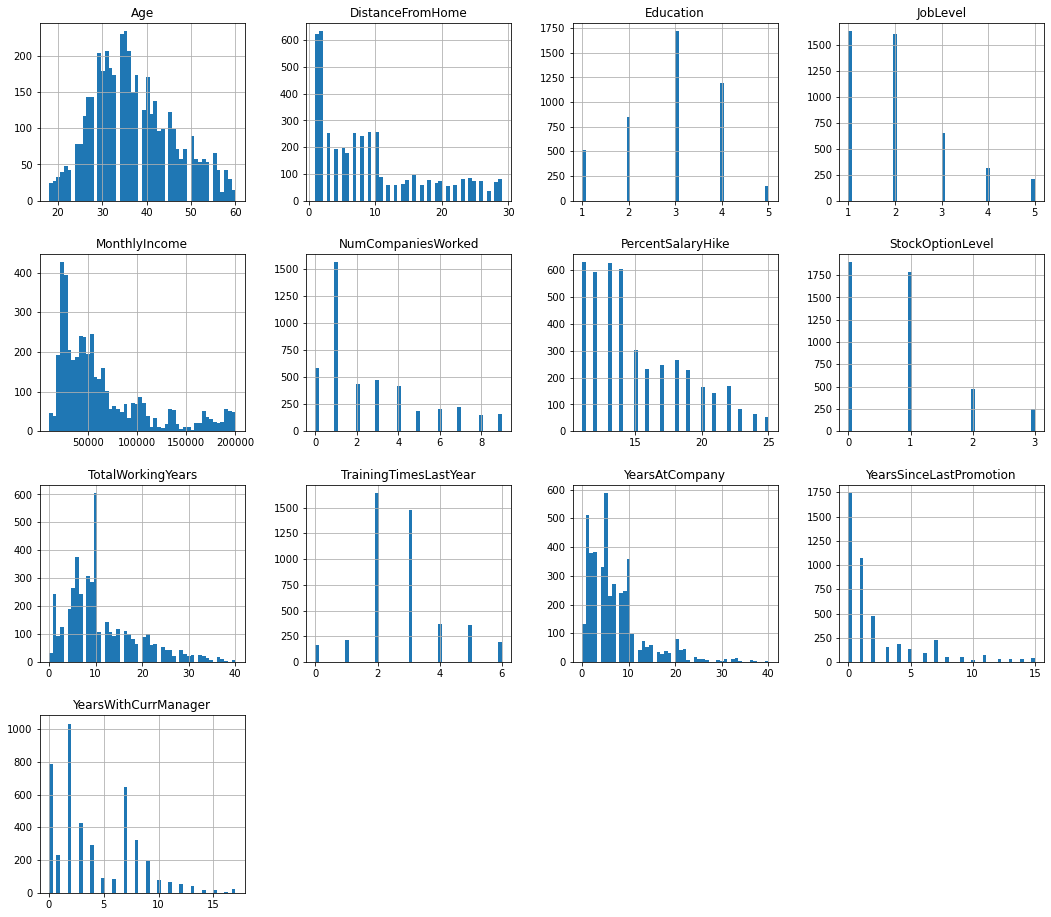

In [11]:
attrition.hist(bins=50, figsize=(18, 16));

___Lets plot the pairplot with the regression___

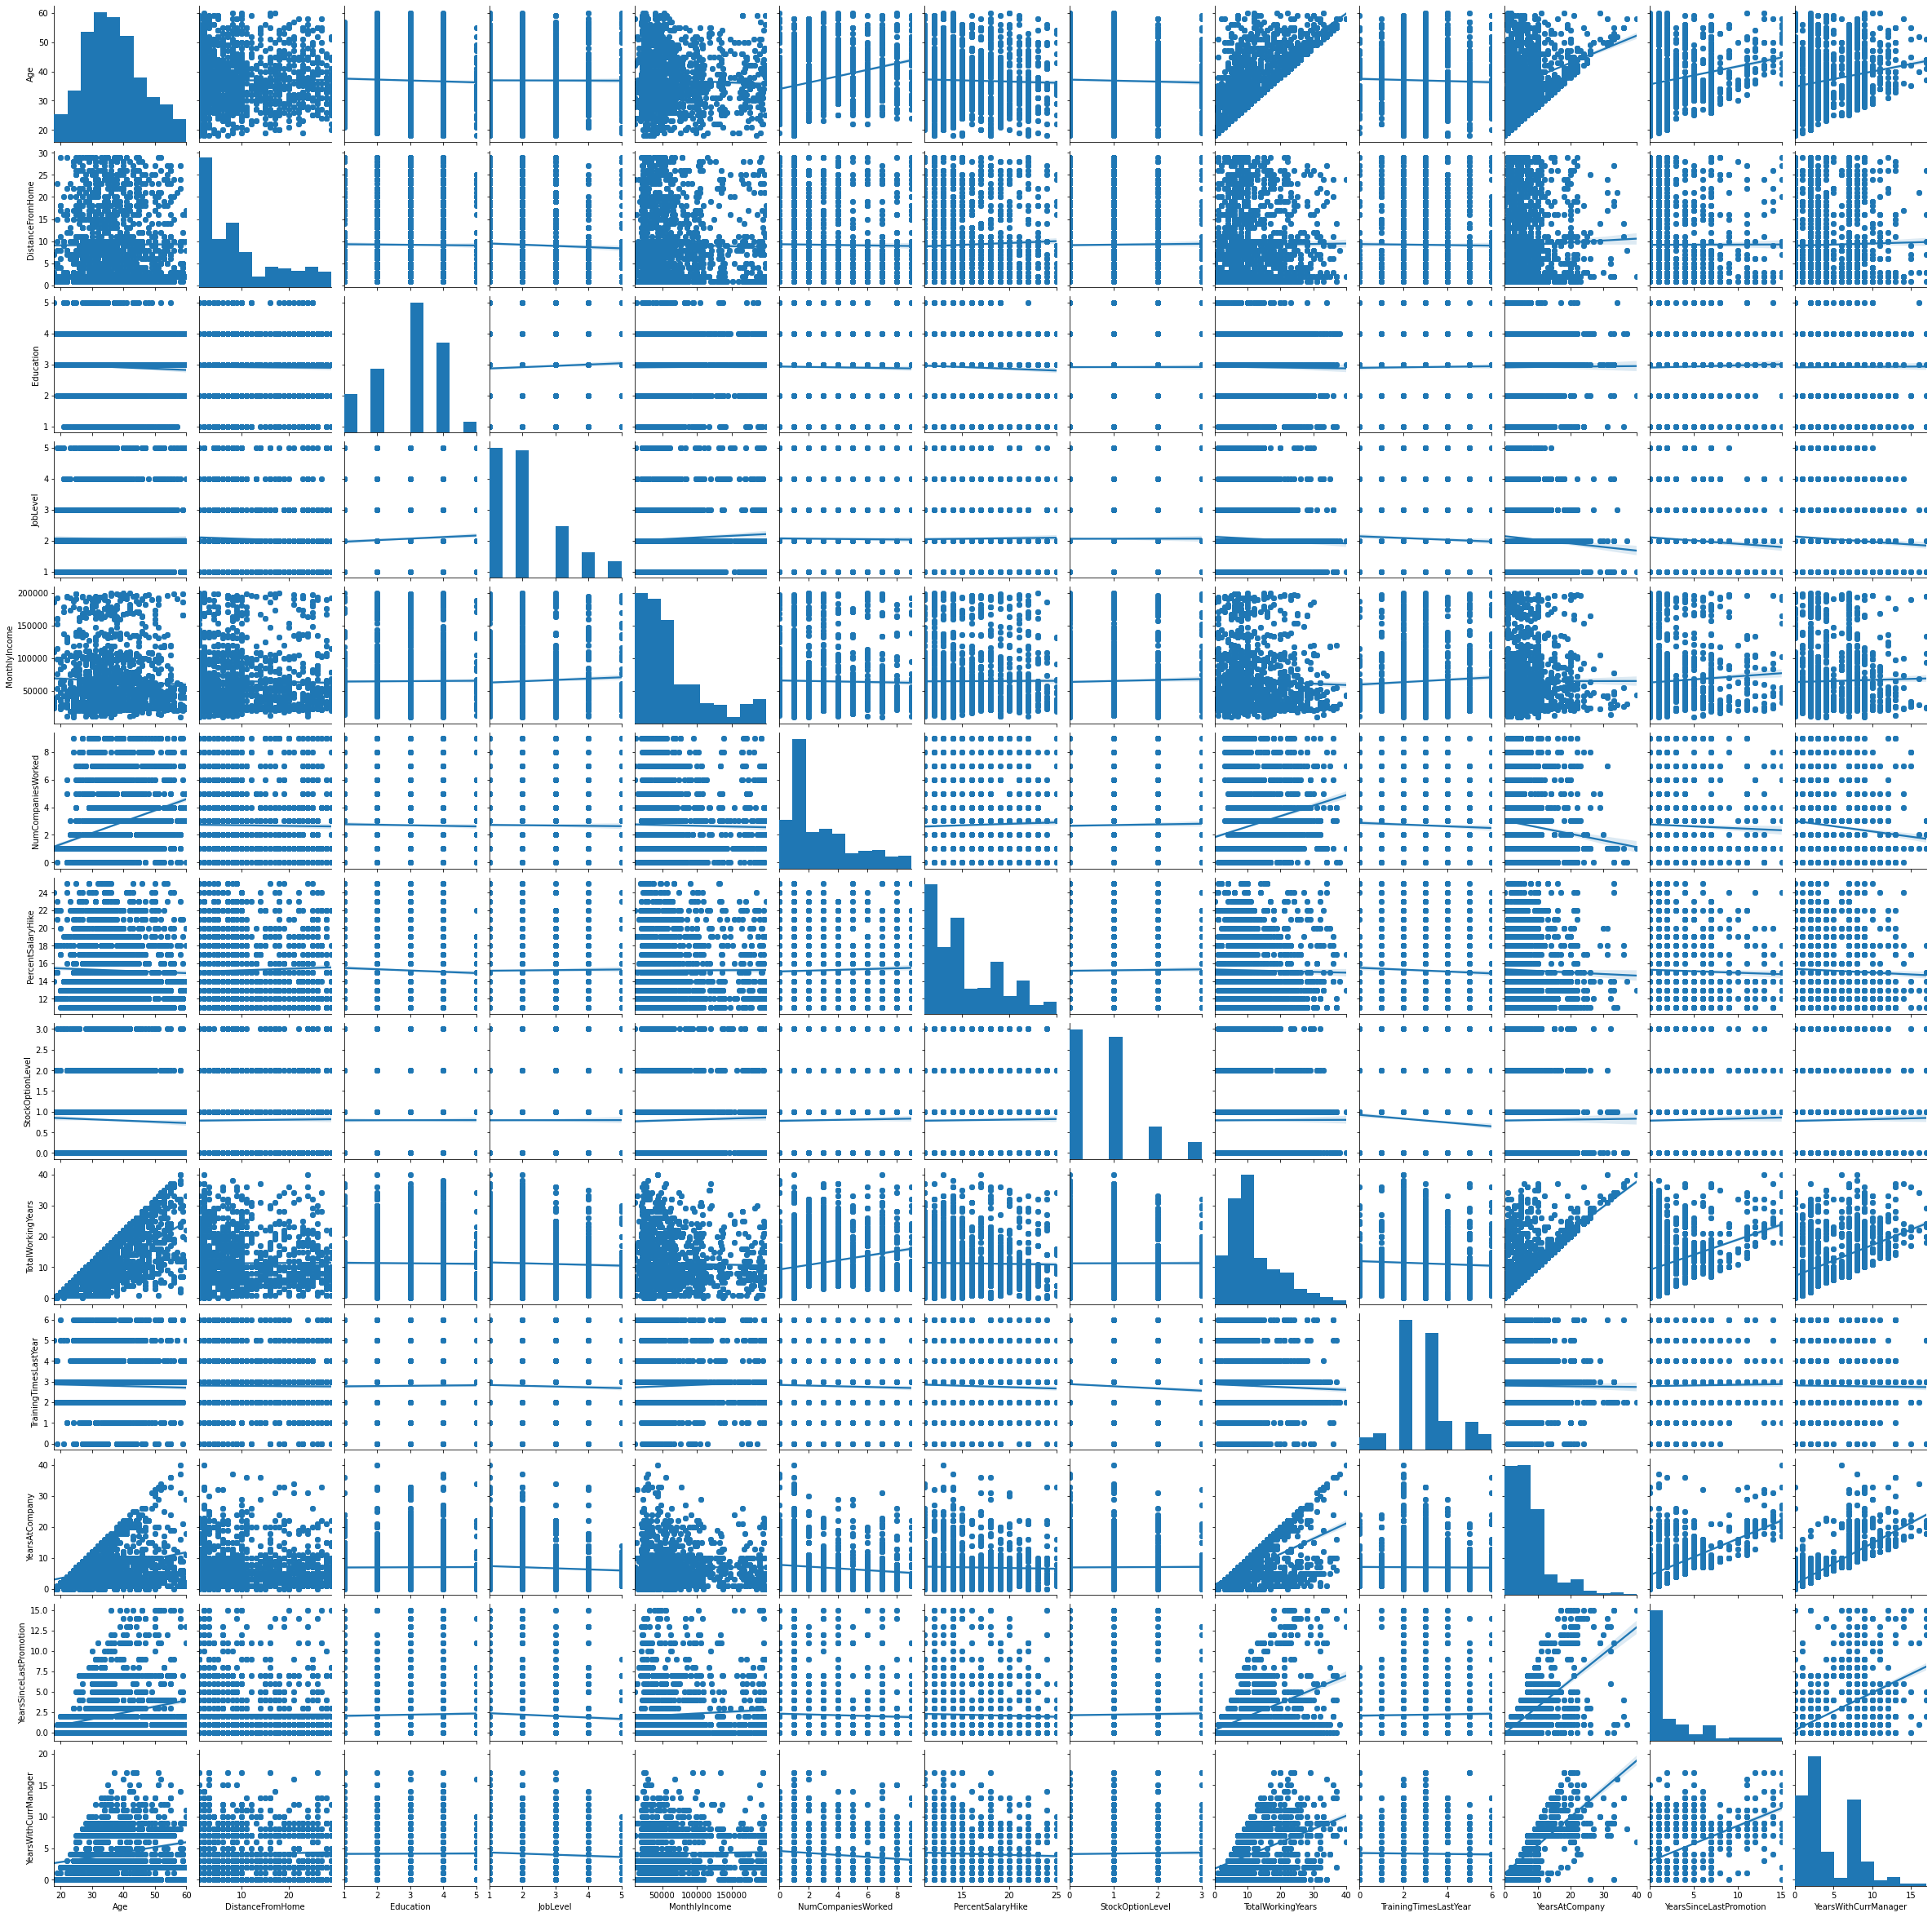

In [12]:
sns.pairplot(attrition, kind='reg')
plt.show();

## Perform the training and test split for the algorithm for the dependent and independent variables

In [13]:
y = attrition.Attrition
X = attrition.drop(labels='Attrition', axis=1)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)

In [15]:
X_train.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
2588,38,Travel_Rarely,Research & Development,3,4,Life Sciences,Female,1,Sales Representative,Divorced,44900,2.0,21,1,10.0,1,5,0,3
2354,45,Travel_Rarely,Sales,29,2,Technical Degree,Female,2,Research Scientist,Single,29730,1.0,12,0,10.0,2,10,1,4
655,45,Travel_Rarely,Human Resources,12,3,Human Resources,Male,2,Laboratory Technician,Single,43060,2.0,11,2,26.0,3,24,1,11
4339,55,Travel_Rarely,Research & Development,6,1,Life Sciences,Female,2,Laboratory Technician,Single,26550,8.0,17,0,36.0,0,24,2,15
3557,44,Travel_Rarely,Research & Development,3,4,Medical,Male,2,Research Scientist,Single,25640,1.0,12,3,20.0,3,20,13,17


In [16]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3528 entries, 2588 to 860
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      3528 non-null   int64  
 1   BusinessTravel           3528 non-null   object 
 2   Department               3528 non-null   object 
 3   DistanceFromHome         3528 non-null   int64  
 4   Education                3528 non-null   int64  
 5   EducationField           3528 non-null   object 
 6   Gender                   3528 non-null   object 
 7   JobLevel                 3528 non-null   int64  
 8   JobRole                  3528 non-null   object 
 9   MaritalStatus            3528 non-null   object 
 10  MonthlyIncome            3528 non-null   int64  
 11  NumCompaniesWorked       3512 non-null   float64
 12  PercentSalaryHike        3528 non-null   int64  
 13  StockOptionLevel         3528 non-null   int64  
 14  TotalWorkingYears     

## Seperate the cateogrical attributes to handle it better with the algorithm

In [17]:
cat_col = ["BusinessTravel", "Department", "EducationField", "Gender", "JobRole", "MaritalStatus"]

In [18]:
for cat in cat_col:
    print("{0}\n".format(X_train[cat].value_counts()))

Travel_Rarely        2486
Travel_Frequently     674
Non-Travel            368
Name: BusinessTravel, dtype: int64

Research & Development    2326
Sales                     1054
Human Resources            148
Name: Department, dtype: int64

Life Sciences       1472
Medical             1105
Marketing            373
Technical Degree     317
Other                197
Human Resources       64
Name: EducationField, dtype: int64

Male      2113
Female    1415
Name: Gender, dtype: int64

Sales Executive              792
Research Scientist           698
Laboratory Technician        619
Manufacturing Director       343
Healthcare Representative    305
Manager                      254
Sales Representative         194
Research Director            192
Human Resources              131
Name: JobRole, dtype: int64

Married     1598
Single      1134
Divorced     796
Name: MaritalStatus, dtype: int64



## Drop the categorical columns

In [19]:
X_train_num = X_train.drop(columns=cat_col, axis=1)

In [20]:
X_train_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3528 entries, 2588 to 860
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      3528 non-null   int64  
 1   DistanceFromHome         3528 non-null   int64  
 2   Education                3528 non-null   int64  
 3   JobLevel                 3528 non-null   int64  
 4   MonthlyIncome            3528 non-null   int64  
 5   NumCompaniesWorked       3512 non-null   float64
 6   PercentSalaryHike        3528 non-null   int64  
 7   StockOptionLevel         3528 non-null   int64  
 8   TotalWorkingYears        3522 non-null   float64
 9   TrainingTimesLastYear    3528 non-null   int64  
 10  YearsAtCompany           3528 non-null   int64  
 11  YearsSinceLastPromotion  3528 non-null   int64  
 12  YearsWithCurrManager     3528 non-null   int64  
dtypes: float64(2), int64(11)
memory usage: 385.9 KB


## Handle the missing values, standard scaler and categorical values with a sklearn pipeline

In [21]:
def prepare_attrition(data):
    numer_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('std_scaler', StandardScaler()),
    ])
    
    num_attrib = list(X_train_num)
    
    full_pipeline = ColumnTransformer([
        ("num", numer_pipeline, num_attrib),
        ("cat", OneHotEncoder(), cat_col),
    ])
    
    return full_pipeline.fit_transform(data)

In [22]:
X_train_prepared = prepare_attrition(X_train)

## Encode the dependent categorical variable, as it is a binary classifier let us apply the LabelBinarizer

In [23]:
y_train = LabelBinarizer().fit_transform(y_train)

## Create a Logistic Regression Model and fit the data

In [24]:
logis = LogisticRegression()
logis.fit(X_train_prepared, y_train);

C:\Users\DhanuShaluGuru\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


## Let us see the model score

In [25]:
logis.score(X_train_prepared, y_train)

0.8486394557823129

In [26]:
logis.coef_

array([[-0.27033738, -0.02612544, -0.08881987, -0.06878019, -0.05624188,
         0.30725731,  0.01660152, -0.07228657, -0.50316816, -0.20857001,
         0.00589525,  0.44441557, -0.4981732 , -0.69907332,  0.68159732,
         0.01498419,  0.48762968, -0.14719027, -0.34293122,  0.58337982,
         0.05767207,  0.02424257, -0.04651096, -0.31841873, -0.30285657,
        -0.04598612,  0.04349431,  0.05622563, -0.30128416,  0.09120679,
        -0.2776721 , -0.45253687,  0.62938928,  0.28393916,  0.21625441,
        -0.24801396, -0.40248067, -0.23691395,  0.63690281]])

In [27]:
logis.intercept_

array([-1.98427738])

_The model is performing good with around __84.86%.___

## Let us predict the model for the test set

__Use the pipeline for preparing the test set and apply the classification on the model__

In [28]:
X_test_prepared = prepare_attrition(X_test)

In [29]:
y_predict = logis.predict(X_test_prepared)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [30]:
y_test

1413     No
3352     No
3970     No
3629    Yes
144      No
       ... 
183      No
4124    Yes
2664    Yes
2292     No
321      No
Name: Attrition, Length: 882, dtype: object

## Let us examine the score on the test set

In [31]:
y_test = LabelBinarizer().fit_transform(y_test)

In [32]:
logis.score(X_test_prepared, y_test)

0.844671201814059

_The prediction on the test set is around __84.46%.___